# ROB311 - Machine Learning for Robotics
## TP6: KMeans Clustering
### Handwritten digits Clusters

Mateus Lopes Ricci

Matheus Melo Monteverde



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from matplotlib import style
style.use('ggplot')
from sklearn import cluster, decomposition, preprocessing
import seaborn as sn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV



## Introduction Example

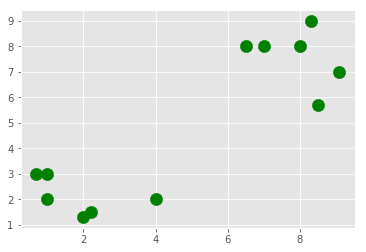

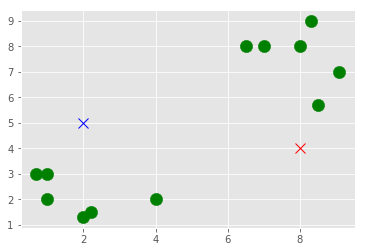

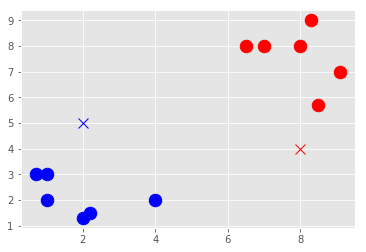

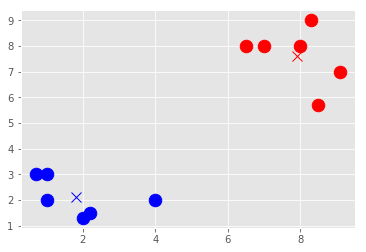

<Figure size 432x288 with 0 Axes>

In [2]:
Ex = np.array([[1, 2],
               [1, 3],
               [7, 8],
               [8.3, 9],
               [9.1, 7],
               [4,2],
               [2.2, 1.5],
               [6.5, 8],
               [8.5, 5.7],
               [0.7, 3],
               [2, 1.3],
               [8, 8]])

Ec = np.array([[2, 5],
               [8, 4]])

colors = ["b.","r."]

plt.scatter(Ex[:,0],Ex[:,1], s=150, c='g')
f1 = plt.figure()
plt.scatter(Ex[:,0],Ex[:,1], s=150, c='g')

for i in range(len(Ec)):
    plt.plot(Ec[i][0], Ec[i][1], colors[i], marker='x' , markersize = 10)
f2 = plt.figure()

clf = cluster.KMeans(n_clusters=2, )
clf.fit(Ex)

centroids = clf.cluster_centers_
labels = clf.labels_

for i in range(len(Ex)):
    plt.plot(Ex[i][0], Ex[i][1], colors[labels[i]], markersize = 25)
for i in range(len(Ec)):
    plt.plot(Ec[i][0], Ec[i][1], colors[i], marker='x' , markersize = 10)
f3 = plt.figure()

for i in range(len(Ex)):
    plt.plot(Ex[i][0], Ex[i][1], colors[labels[i]], markersize = 25)
for i in range(len(Ec)):
    plt.plot(centroids[i][0], centroids[i][1], colors[i], marker='x' , markersize = 10)
f4 = plt.figure()
plt.show()

## Clustering Handwritten Digits 

## Reading the Data

In [3]:
# Read data file
df1 = pd.read_csv('datasets/optdigits_tra.csv', header=None)
df2 = pd.read_csv('datasets/optdigits_tes.csv', header=None)

# Separate data into input and output for training  

X_train = np.array(df1.drop(df1.columns[-1],1))
#X_train = preprocessing.scale(X_train)
Y_train = np.array(df1[df1.columns[-1]])

# Separate data into input and output for testing
X_test = np.array(df2.drop(df2.columns[-1],1))
#X_test = preprocessing.scale(X_test)
Y_test = np.array(df2[df2.columns[-1]])

## Definition of the Model 

In [4]:
# Introducing PCA and Classifier
pca = decomposition.PCA(whiten=True, n_components=36)
kmeans = cluster.KMeans(n_clusters=10)

# Introducing model
#model = Pipeline(steps=[('pca', pca), ('kmeans', kmeans)])
model = kmeans
model.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Prediction of Model

In [5]:
## Prediction Train
predict_me = np.array(X_train)
predict_me = predict_me.reshape(-1, len(predict_me[0,:]))
predictions_train = model.predict(predict_me)

## Prediction Test
predict_me = np.array(X_test)
predict_me = predict_me.reshape(-1, len(predict_me[0,:]))
predictions_test = model.predict(predict_me)


## Confusion Matrix for Training

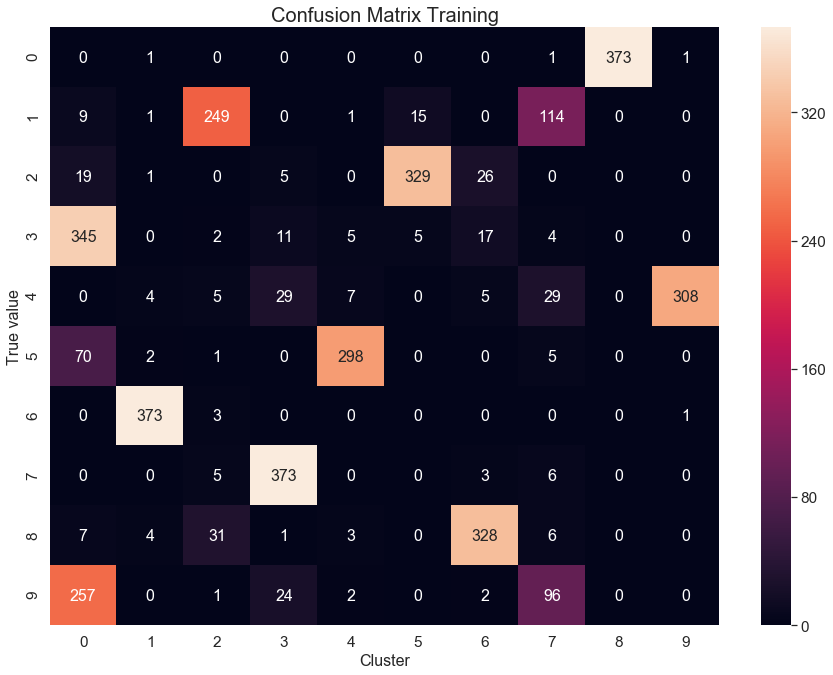

In [6]:
# True values
y_true_train = Y_train


# Predicted Values
y_clust_train = predictions_train


# Confusion Matrix Training
disp1 = confusion_matrix(y_true_train, y_clust_train, labels = [0,1,2,3,4,5,6,7,8,9])
df_cm1 = pd.DataFrame(disp1)

# Plot Confusion Matrix Training
plt.figure(figsize=(15,11))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm1, annot=True, annot_kws={"size": 16},fmt='g') # font size
plt.title('Confusion Matrix Training', fontsize = 20) # title with fontsize 20
plt.xlabel('Cluster', fontsize = 16) # x-axis label with fontsize 15
plt.ylabel('True value', fontsize = 16) # y-axis label with fontsize 15


plt.show()


## Confusion Matrix for Testing

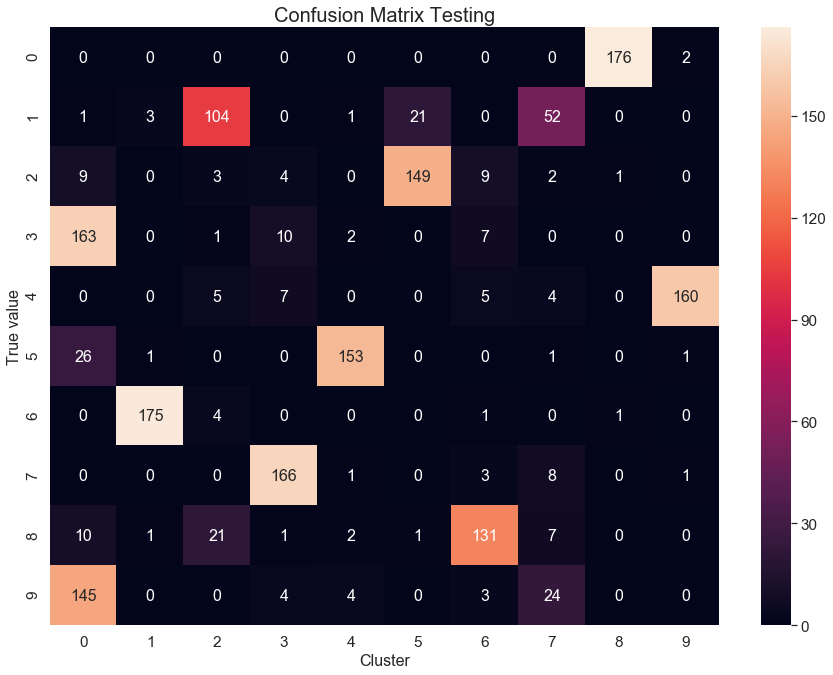

In [7]:
# True values
y_true_test  = Y_test

# Predicted Values
y_clust_test  = predictions_test

# Confusion Matrix Testing
disp2 = confusion_matrix(y_true_test, y_clust_test, labels = [0,1,2,3,4,5,6,7,8,9])
df_cm2 = pd.DataFrame(disp2)

# Plot Confusion Matrix Testing
plt.figure(figsize=(15,11))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm2, annot=True, annot_kws={"size": 16},fmt='g') # font size
plt.title('Confusion Matrix Testing', fontsize = 20) # title with fontsize 20
plt.xlabel('Cluster', fontsize = 16) # x-axis label with fontsize 15
plt.ylabel('True value', fontsize = 16) # y-axis label with fontsize 15

plt.show()